In [72]:
import uproot
import awkward as ak

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [ ]:
f = uproot.open("/home/work/gem/testbeam/july2022/runs/tracks/00000135_new.root")
f.keys()

In [ ]:
t = f["trackTree"]
t.keys()

In [75]:
events = t.arrays(
    ["rechitChamber", "rechitGlobalX", "rechitGlobalY",
     "partialTrackChamber", "partialTrackChi2",
     "partialProphitGlobalX", "partialProphitGlobalY"]
)

In [76]:
rechits_chamber = events["rechitChamber"]
rechits_x = events["rechitGlobalX"]
rechits_y = events["rechitGlobalY"]

print(rechits_chamber, ak.count(rechits_chamber, axis=1))
print(rechits_x, ak.count(rechits_x, axis=1))
print(rechits_y, ak.count(rechits_y, axis=1))

[[6], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, ... [0, 1, 2, 3, 6], [0, 1, 2, 3, 4, 5, 6]] [1, 7, 7, 13, 8, 7, 1, 5, 7, 7, 9, 1, 7, ... 7, 1, 2, 7, 7, 1, 7, 8, 1, 5, 7, 5, 7]
[[-22.1], [40.4, -1.3e-05, -1.32e-05, ... -1.43e-05, -12.9, -13.9, -1.49e-05, 20]] [1, 7, 7, 13, 8, 7, 1, 5, 7, 7, 9, 1, 7, ... 7, 1, 2, 7, 7, 1, 7, 8, 1, 5, 7, 5, 7]
[[345], [0, 41.4, 42, 2.43e-05, 0, ... [0, 44.7, 45.7, -8.09e-06, 0, 47.5, 345]] [1, 7, 7, 13, 8, 7, 1, 5, 7, 7, 9, 1, 7, ... 7, 1, 2, 7, 7, 1, 7, 8, 1, 5, 7, 5, 7]


In [77]:
prophits_chamber = events["partialTrackChamber"]
prophits_x = events["partialProphitGlobalX"]
prophits_y = events["partialProphitGlobalY"]

print(prophits_chamber, ak.count(prophits_chamber, axis=1))
print(prophits_x, ak.count(prophits_x, axis=1))
print(prophits_y, ak.count(prophits_y, axis=1))

[[], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, ... [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]] [0, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 0, 6, 0, ... 6, 0, 0, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6]
[[], [39.1, 40.2, 39.4, 39.6, 34.6, 37.6, ... [-12.5, -11, -12, -11.7, -17.7, -14.3]] [0, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 0, 6, 0, ... 6, 0, 0, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6]
[[], [41.4, 41.3, 42.1, 42.1, 43.5, 43.2, ... [44.8, 44.9, 45.6, 45.6, 47.5, 47.8]] [0, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 0, 6, 0, ... 6, 0, 0, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6]


In [89]:
tested_chamber = 3

rechits_x_chamber = rechits_x[rechits_chamber==tested_chamber]
rechits_y_chamber = rechits_y[rechits_chamber==tested_chamber]
prophits_x_chamber = prophits_x[prophits_chamber==tested_chamber]
prophits_y_chamber = prophits_y[prophits_chamber==tested_chamber]

print(rechits_x_chamber)
print(rechits_y_chamber)
print(prophits_x_chamber)
print(prophits_y_chamber)

[[], [38.7], [27.1], [-31.1], [19.7], ... [], [7.81], [-14.6], [27.7], [-12.9]]
[[], [2.43e-05], [1.7e-05], [-1.95e-05], ... [-9.2e-06], [1.74e-05], [-8.09e-06]]
[[], [39.6], [28.1], [-31.1], [20.7, ... [-7.67e-06], [-13.5], [0.000364], [-11.7]]
[[], [42.1], [27.8], [28.9], [21.4], ... [], [47.1], [4.81], [48.2], [45.6]]


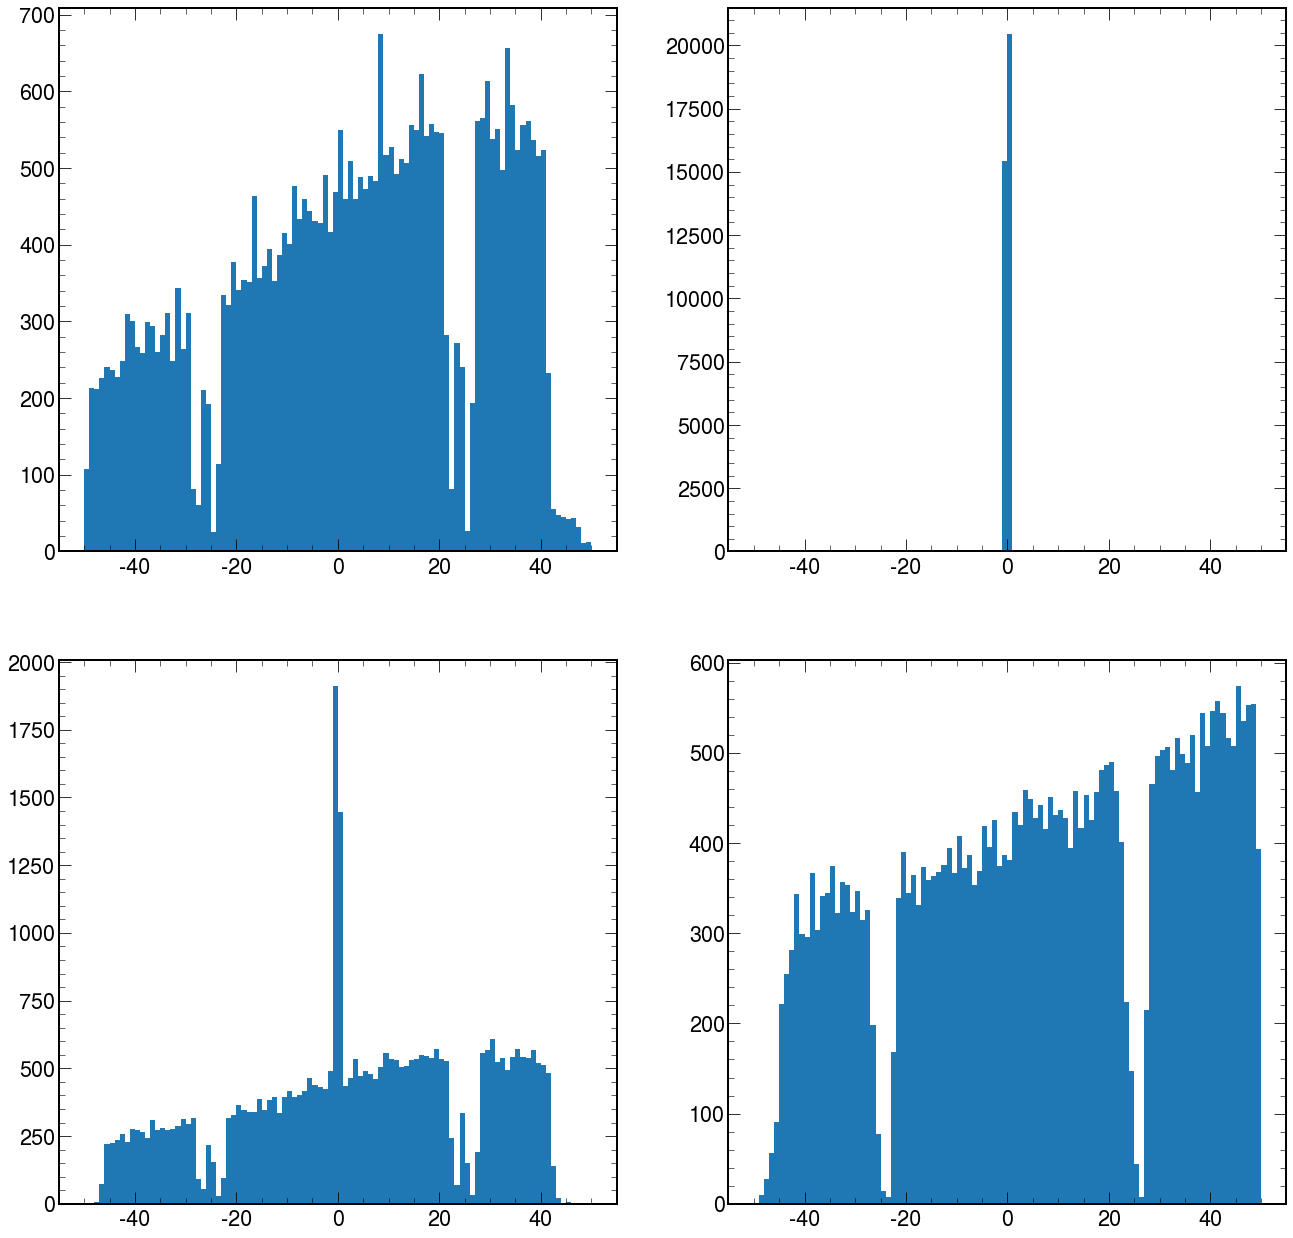

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22,22))
_ = ax[0][0].hist(ak.flatten(rechits_x_chamber), bins=100, range=(-50,50))
_ = ax[0][1].hist(ak.flatten(rechits_y_chamber), bins=100, range=(-50,50))
_ = ax[1][0].hist(ak.flatten(prophits_x_chamber), bins=100, range=(-50,50))
_ = ax[1][1].hist(ak.flatten(prophits_y_chamber), bins=100, range=(-50,50))

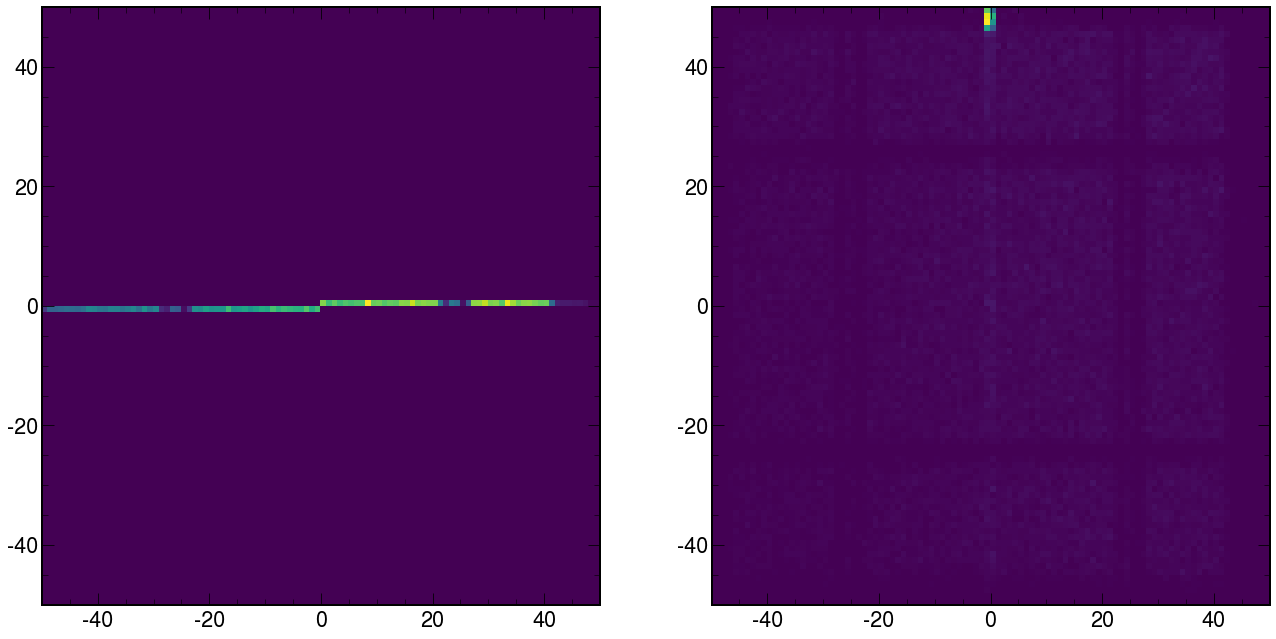

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22,11))
_ = ax[0].hist2d(
    ak.flatten(rechits_x_chamber), ak.flatten(rechits_y_chamber), bins=(100,100), range=((-50,50),(-50,50))
)
_ = ax[1].hist2d(
    ak.flatten(prophits_x_chamber), ak.flatten(prophits_y_chamber), bins=(100,100), range=((-50,50),(-50,50))
)

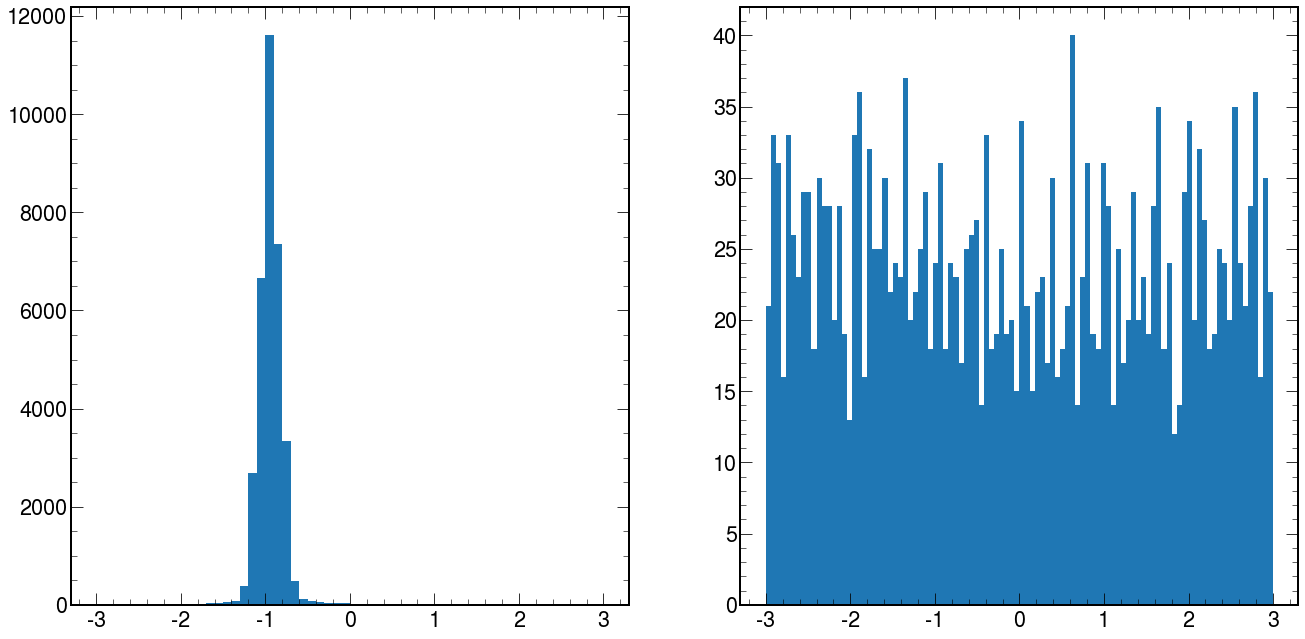

In [92]:
# choose only events with both a prophit and a rechit
residual_x_filter = (ak.count(rechits_x_chamber, axis=1)>0)&(ak.count(prophits_x_chamber, axis=1)>0)
residuals_x = rechits_x_chamber[residual_x_filter]-prophits_x_chamber[residual_x_filter]

residual_y_filter = (ak.count(rechits_y_chamber, axis=1)>0)&(ak.count(prophits_y_chamber, axis=1)>0)
residuals_y = rechits_y_chamber[residual_y_filter]-prophits_y_chamber[residual_y_filter]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22,11))
_ = ax[0].hist(residuals_x, bins=60, range=(-3,3))
_ = ax[1].hist(residuals_y, bins=100, range=(-3,3))